In [48]:
import cv2
import matplotlib.pyplot as plt
RAW_PAINT_DATA_PATH="./data/raw_paint_data/"
RAW_PAINT_DATA_OUTPUT_PATH="./data/raw_train_data/"


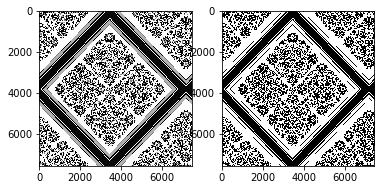

True

In [114]:
# 处理图像 00019 -> 0
# 图像19: 
raw_19_train = RAW_PAINT_DATA_PATH + "/00019/170224j6sm.jpg"
raw_19_label = RAW_PAINT_DATA_PATH + "/00019/170224j6ok.jpg"

img=cv2.imread(raw_19_label)
GrayImage=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh1=cv2.threshold(GrayImage,127,1,cv2.THRESH_BINARY)
plt.subplot(1,2,1),plt.imshow(GrayImage,'gray')
plt.subplot(1,2,2),plt.imshow(thresh1, 'gray')
plt.show()
file_name = RAW_PAINT_DATA_OUTPUT_PATH + "raw_0_label.jpg"
cv2.imwrite(file_name, thresh1)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(array([   0,    0,    0, ..., 2525, 2525, 2525]), array([ 121,  122,  123, ..., 2682, 2683, 2684]))
[1 1 1 ... 1 1 1]


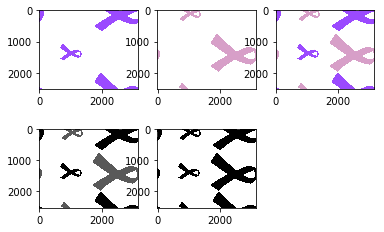

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(array([   0,    0,    0, ..., 2525, 2525, 2525]), array([ 122,  123,  124, ..., 2683, 2684, 2685]))
[1 1 1 ... 1 1 1]


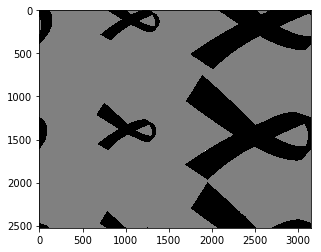

In [94]:
import numpy as np
# 处理图像39 -> 1
raw_39_train = RAW_PAINT_DATA_PATH + "/00039/170411b3sm.jpg"
raw_39_label_1 = RAW_PAINT_DATA_PATH + "/00039/170411b3-1.jpg"
raw_39_label_2 = RAW_PAINT_DATA_PATH + "/00039/170411b3-2.jpg"

img_1 = cv2.imread(raw_39_label_1)
img_2 = cv2.imread(raw_39_label_2)
img = img_1 + img_2 - 255 
GrayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,thresh1 = cv2.threshold(GrayImage,220,1,cv2.THRESH_BINARY)
thresh1_np = np.array(thresh1)
print thresh1
print thresh1.nonzero()
print thresh1[thresh1.nonzero()]
plt.subplot(2,3,1),plt.imshow(img_1)
plt.subplot(2,3,2),plt.imshow(img_2)
plt.subplot(2,3,3),plt.imshow(img)
plt.subplot(2,3,4),plt.imshow(GrayImage, 'gray')
plt.subplot(2,3,5),plt.imshow(thresh1, 'gray')
plt.show()
file_name = RAW_PAINT_DATA_OUTPUT_PATH + "raw_1_label.jpg"
cv2.imwrite(file_name, thresh1)

img_fin = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)
img_np = np.array(img_fin)
print img_fin
print img_np.nonzero()
print img_np[img_np.nonzero()]
plt.imshow(img_fin, 'gray')
plt.show()

In [119]:
# 2. Random Crop
INPUT_SIZE = 512
RAW_RC_DATA_INPUT_PATH = RAW_PAINT_DATA_OUTPUT_PATH
RAW_RC_DATA_OUTPUT_PATH = "./data/rc_train_data/"
# 图像 0
raw_pre = "raw_1_"
raw_train = RAW_RC_DATA_INPUT_PATH + raw_pre + "train.jpg"
raw_label = RAW_RC_DATA_INPUT_PATH + raw_pre + "label.jpg"

img_train = cv2.imread(raw_train)
img_label = cv2.imread(raw_label, cv2.IMREAD_GRAYSCALE)
crop_w = INPUT_SIZE
crop_h = INPUT_SIZE
img_h, img_w = img_train.shape[:2]
img_h_range = img_h - INPUT_SIZE
img_w_range = img_w - INPUT_SIZE
stride_size = 100

## Test
# x = 0
# y = 0
# cropped_train = img_0_train[x:(x + INPUT_SIZE), y:(y + INPUT_SIZE)]
# cropped_label = img_0_label[x:(x + INPUT_SIZE), y:(y + INPUT_SIZE)]
# plt.subplot(1,2,1),plt.imshow(cropped_train)
# plt.subplot(1,2,2),plt.imshow(cropped_label, 'gray')
# plt.show()
# train_file_name = RAW_RC_DATA_OUTPUT_PATH + raw_0_pre + "train_0.jpg"
# label_file_name = RAW_RC_DATA_OUTPUT_PATH + raw_0_pre + "label_0.jpg"
# cv2.imwrite(train_file_name, cropped_train)
# cv2.imwrite(label_file_name, cropped_label)

## Create training data
train_img_file_list = RAW_RC_DATA_OUTPUT_PATH + "train_img_file_list.txt"
label_img_file_list = RAW_RC_DATA_OUTPUT_PATH + "label_img_file_list.txt"
fin_train_file = open(train_img_file_list, "a+")
fin_label_file = open(label_img_file_list, "a+")
cnt = 0
for x in xrange(0, img_h_range, stride_size):
    for y in xrange(0, img_w_range, stride_size):
        cropped_train = img_train[x:(x + INPUT_SIZE), y:(y + INPUT_SIZE)]
        cropped_label = img_label[x:(x + INPUT_SIZE), y:(y + INPUT_SIZE)]
        cnt = cnt + 1
        train_file_name = RAW_RC_DATA_OUTPUT_PATH + "/images/" + raw_pre + "train_" + str(cnt) + ".jpg"
        label_file_name = RAW_RC_DATA_OUTPUT_PATH + "/labels/" + raw_pre + "label_" + str(cnt) + ".jpg"
        fin_train_file.write(train_file_name + '\n')
        fin_label_file.write(label_file_name + '\n')
        cv2.imwrite(train_file_name, cropped_train)
        cv2.imwrite(label_file_name, cropped_label)

fin_train_file.close()
fin_label_file.close()

print "Generate " + str(cnt) + " <train, label> pairs"


Generate 567 <train, label> pairs


[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


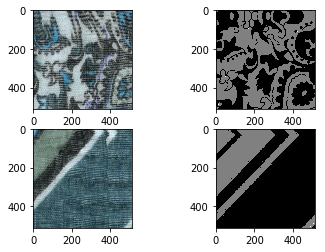

In [117]:
Test_TRAIN_DATA_1=RAW_RC_DATA_OUTPUT_PATH + "/images/" + "raw_0_train_4.jpg"
Test_LABEL_DATA_1=RAW_RC_DATA_OUTPUT_PATH + "/labels/" + "raw_0_label_4.jpg"
img_train_1 = cv2.imread(Test_TRAIN_DATA_1)
img_label_1 = cv2.imread(Test_LABEL_DATA_1, cv2.IMREAD_GRAYSCALE)
img_label_1_np = np.array(img_label_1)
print img_label_1_np[img_label_1_np.nonzero()]

Test_TRAIN_DATA_2=RAW_RC_DATA_OUTPUT_PATH + "/images/" + "raw_0_train_29.jpg"
Test_LABEL_DATA_2=RAW_RC_DATA_OUTPUT_PATH + "/labels/" + "raw_0_label_29.jpg"
img_train_2 = cv2.imread(Test_TRAIN_DATA_2)
img_label_2 = cv2.imread(Test_LABEL_DATA_2, cv2.IMREAD_GRAYSCALE)
img_label_2_np = np.array(img_label_2)
print img_label_2_np[img_label_2_np.nonzero()]

plt.subplot(2,2,1),plt.imshow(img_train_1)
plt.subplot(2,2,2),plt.imshow(img_label_1, 'gray')
plt.subplot(2,2,3),plt.imshow(img_train_2)
plt.subplot(2,2,4),plt.imshow(img_label_2, 'gray')
plt.show()

In [109]:
import numpy as np
a =  np.array([1,2,3,4])
print a[:-1]
print a[:3]
print a[3:]

[1 2 3]
[1 2 3]
[4]
